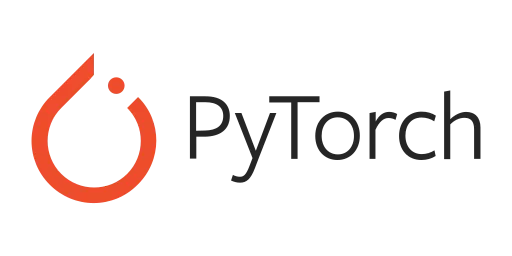

# 파이토치(PyTorch)

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공

## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용

## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능

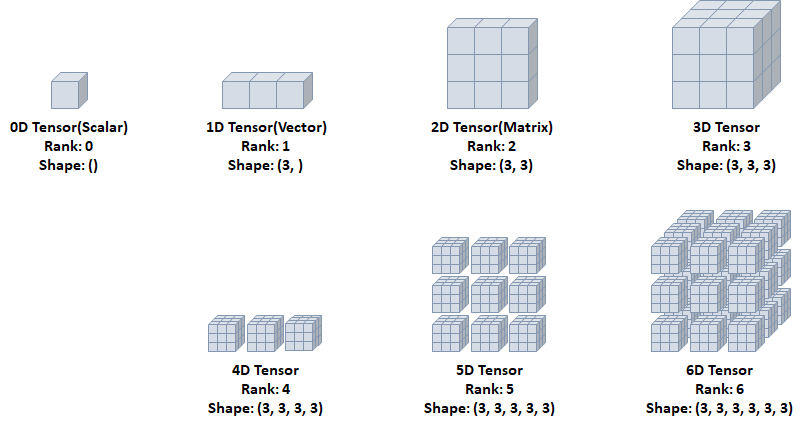

In [227]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets
import torch.optim as optim
torch.__version__

'2.4.1'

### 텐서 초기화와 데이터 타입

초기화 되지 않은 텐서

In [150]:
x = torch.empty(4,2) # 메모리에 이미 있던 임의의 값으로 채워짐
print(x)

tensor([[2.1123e+14, 1.2934e-42],
        [2.3694e-38, 2.3694e-38],
        [2.3694e-38, 0.0000e+00],
        [1.4013e-45, 0.0000e+00]])


무작위로 초기화된 텐서

In [151]:
x = torch.rand(4,2)
print(x)

tensor([[0.5012, 0.1850],
        [0.6380, 0.1443],
        [0.8598, 0.2312],
        [0.5435, 0.0660]])


데이터 타입(dtype)이 long이고, 0으로 채워진 텐서

In [152]:
x = torch.zeros(4,2,dtype=torch.long) # long과 short는 주로 C/C++과 같은 저수준 언어에서 사용되는 정수형 자료형입니다
print(x) # short 자료형은 일반적으로 2바이트(16비트)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


사용자가 입력한 값으로 텐서 초기화

In [153]:
x = torch.tensor([3,2,3])
print(x) # long 자료형은 일반적으로 4바이트(32비트)

tensor([3, 2, 3])


In [154]:
# x와 같은 크기, float 타입, 무작위로 채워진 텐서
x = torch.randn_like(x,dtype=torch.float)
print(x)

tensor([0.8945, 1.3363, 1.6118])


텐서의 크기 계산

In [155]:
print(x.size())

torch.Size([3])


### 데이터 타입(Data Type)

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |

비트 바이트 참고 : https://iosbeginner.tistory.com/55

In [156]:
# 임의의 실수형 텐서 생성
ft = torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [157]:
# 16 비트 정수형으로 변환
print(ft.short())
# 32 비트 정수형으로 변환
print(ft.int())
# 64 비트 정수형으로 변환
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [158]:
# 부동소수점 텐서 생성. 부동소수점 : 실수를 근사할때 소수점 위치를 고정하지 않고 그 위치를 나타내는 수를 따로 적는 방식
ft = torch.FloatTensor([1,2,3])
print(ft)  # 텐서 출력
print(ft.dtype)  # 텐서의 데이터 타입 출력

tensor([1., 2., 3.])
torch.float32


In [159]:
# 32비트 부동소수점으로 변환
print(ft.float())
# 64비트 부동소수점으로 변환  
print(ft.double())
# 16비트 부동소수점으로 변환
print(ft.half())

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


### CUDA Tensors

- `.to` 메소드를 사용하여 텐서를 어떠한 장치(cpu, gpu)로도 옮길 수 있음

In [160]:

# GPU가 사용 가능한지 확인하고 사용 가능하면 GPU를, 아니면 CPU를 사용
device = torch.device('cuda' if torch.cuda.is_available() else'cpu')
print(device) # 사용 가능 디바이스 출력
y = torch.ones_like(x,device=device)
print(y)
x=x.to(device)
z = x + y
print(z)
# GPU 텐서를 CPU로 이동 
print(z.to('cpu',torch.double))

cpu
tensor([1., 1., 1.])
tensor([1.8945, 2.3363, 2.6118])
tensor([1.8945, 2.3363, 2.6118], dtype=torch.float64)


### 다차원 텐서 표현

0D Tensor(Scalar)

* 하나의 숫자를 담고 있는 텐서(tensor)
* 축과 형상이 없음

In [161]:
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


1D Tensor(Vector)

* 값들을 저장한 리스트와 유사한 텐서
* 하나의 축이 존재

In [162]:
t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


2D Tensor(Matrix)

* 행렬과 같은 모양으로 두개의 축이 존재
* 일반적인 수치, 통계 데이터셋이 해당
* 주로 샘플(samples)과 특성(features)을 가진 구조로 사용

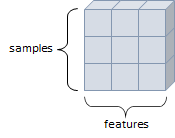

In [163]:
t2 = torch.tensor([[1,2,3],
                   [4,5,6],
                   [7,8,9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


3D Tensor

* 큐브(cube)와 같은 모양으로 세개의 축이 존재
* 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
* 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
* 주로 샘플(samples), 타임스텝(timesteps), 특성(features)을 가진 구조로 사용

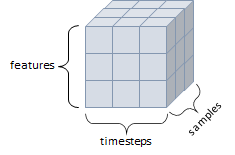

In [164]:
t3 = torch.tensor([[[1,2,3],
                    [4,5,6],
                    [7,8,9]],
                   [[1,2,3],
                    [4,5,6],
                    [7,8,9]],
                   [[1,2,3],
                    [4,5,6],
                    [7,8,9]]])
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


4D Tensor

* 4개의 축
* 컬러 이미지 데이터가 대표적인 사례 (흑백 이미지 데이터는 3D Tensor로 가능)
* 주로 샘플(samples), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

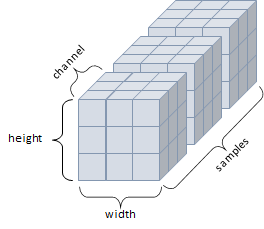

5D Tensor

* 5개의 축
* 비디오 데이터가 대표적인 사례
* 주로 샘플(samples), 프레임(frames), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

### 텐서의 연산(Operations)

* 텐서에 대한 수학 연산, 삼각함수, 비트 연산, 비교 연산, 집계 등 제공

In [165]:
import math

a = torch.rand(1,2) * 2 - 1
print(a)
print(torch.abs(a)) # 절대값
print(torch.ceil(a)) # 올림
print(torch.floor(a)) # 내림
print(torch.clamp(a,-0.5,0.5)) # min 혹은 max의 범주에 해당하도록 값을 변경하는 것, Relu 함수 구현

tensor([[0.6216, 0.7804]])
tensor([[0.6216, 0.7804]])
tensor([[1., 1.]])
tensor([[0., 0.]])
tensor([[0.5000, 0.5000]])


In [166]:
import math
def Lelu(x):
  return torch.clamp(x, 0, math.inf)

Lelu(torch.tensor(-32))

tensor(0.)

In [167]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1, 2, 3, 1 , 2, 3])))

tensor([[0.6216, 0.7804]])
tensor(0.6216)
tensor(0.7804)
tensor(0.7010)
tensor(0.1123)
tensor(0.4851)
tensor([1, 2, 3])


`max`와 `min`은 `dim` 인자를 줄 경우 argmax와 argmin도 함께 리턴
- argmax: 최대값을 가진 인덱스
- argmin: 최소값을 가진 인덱스



In [168]:
x = torch.rand(2,2)
print(x)
print(x.max(dim=0)) # dim=0은 0번 차원(행)을 축소하여 열마다 최대값을 찾는다"는 의미
print(x.max(dim=1)) # dim=1은 1번 차원(열)을 축소하여 행마다 최대값을 찾는다"는 의미


tensor([[0.1717, 0.1899],
        [0.2519, 0.9195]])
torch.return_types.max(
values=tensor([0.2519, 0.9195]),
indices=tensor([1, 1]))
torch.return_types.max(
values=tensor([0.1899, 0.9195]),
indices=tensor([1, 1]))


In [169]:
print(x)
print(x.min(dim=0))
print(x.min(dim=1))

tensor([[0.1717, 0.1899],
        [0.2519, 0.9195]])
torch.return_types.min(
values=tensor([0.1717, 0.1899]),
indices=tensor([0, 0]))
torch.return_types.min(
values=tensor([0.1717, 0.2519]),
indices=tensor([0, 0]))


In [170]:
x = torch.rand(2,2)
print(x)
y = torch.rand(2,2)
print(y)

tensor([[0.2151, 0.4099],
        [0.3167, 0.5545]])
tensor([[0.0648, 0.7482],
        [0.2377, 0.5214]])


`torch.add`: 덧셈

In [171]:
print(x + y)
print(torch.add(x,y))

tensor([[0.2800, 1.1581],
        [0.5544, 1.0759]])
tensor([[0.2800, 1.1581],
        [0.5544, 1.0759]])


결과 텐서를 인자로 제공

In [172]:
result = torch.empty(2, 2)
torch.add(x, y, out=result) # 결과를 여기에 넣어줘
print(result)

tensor([[0.2800, 1.1581],
        [0.5544, 1.0759]])


`in-place` 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [173]:
print(x)
print(y)
y.add_(x) # y에 저장
print(y)

tensor([[0.2151, 0.4099],
        [0.3167, 0.5545]])
tensor([[0.0648, 0.7482],
        [0.2377, 0.5214]])
tensor([[0.2800, 1.1581],
        [0.5544, 1.0759]])


`torch.sub`: 뺄셈

In [174]:
print(x)
print(y)
print(x-y)
print(torch.sub(x,y))
print(x.sub(y))

tensor([[0.2151, 0.4099],
        [0.3167, 0.5545]])
tensor([[0.2800, 1.1581],
        [0.5544, 1.0759]])
tensor([[-0.0648, -0.7482],
        [-0.2377, -0.5214]])
tensor([[-0.0648, -0.7482],
        [-0.2377, -0.5214]])
tensor([[-0.0648, -0.7482],
        [-0.2377, -0.5214]])


`torch.mul`: 곱셉

In [175]:
print(x)
print(y)
print(x*y)
print(torch.mul(x,y))
print(x.mul(y))

tensor([[0.2151, 0.4099],
        [0.3167, 0.5545]])
tensor([[0.2800, 1.1581],
        [0.5544, 1.0759]])
tensor([[0.0602, 0.4747],
        [0.1756, 0.5966]])
tensor([[0.0602, 0.4747],
        [0.1756, 0.5966]])
tensor([[0.0602, 0.4747],
        [0.1756, 0.5966]])


`torch.div`: 나눗셈

In [176]:
print(x)
print(y)
print(x/y)
print(torch.div(x,y))
print(x.div(y))

tensor([[0.2151, 0.4099],
        [0.3167, 0.5545]])
tensor([[0.2800, 1.1581],
        [0.5544, 1.0759]])
tensor([[0.7684, 0.3539],
        [0.5713, 0.5154]])
tensor([[0.7684, 0.3539],
        [0.5713, 0.5154]])
tensor([[0.7684, 0.3539],
        [0.5713, 0.5154]])


`torch.mm`: 내적(dot product)

In [177]:
print(x)
print(y)
print(torch.matmul(x,y))
z=torch.mm(x,y)
print(z)
print(torch.svd(z))

tensor([[0.2151, 0.4099],
        [0.3167, 0.5545]])
tensor([[0.2800, 1.1581],
        [0.5544, 1.0759]])
tensor([[0.2875, 0.6902],
        [0.3961, 0.9635]])
tensor([[0.2875, 0.6902],
        [0.3961, 0.9635]])
torch.return_types.svd(
U=tensor([[-0.5831, -0.8124],
        [-0.8124,  0.5831]]),
S=tensor([1.2823, 0.0028]),
V=tensor([[-0.3817, -0.9243],
        [-0.9243,  0.3817]]))


### 텐서의 조작(Manipulations)

인덱싱(Indexing): NumPy처럼 인덱싱 형태로 사용가능

In [178]:
x = torch.Tensor([[1, 2],
                  [3,4]])
print(x)

print(x[0, 0])
print(x[0, 1])
print(x[1, 0])
print(x[1, 1])

print(x[:, 0])
print(x[:, 1])
print(x[0, :])
print(x[1,: ])


tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([1., 3.])
tensor([2., 4.])
tensor([1., 2.])
tensor([3., 4.])


`view`: 텐서의 크기(size)나 모양(shape)을 변경

- 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
- -1로 설정되면 계산을 통해 해당 크기값을 유추

In [179]:
x = torch.randn(4, 5)
print(x)
y = x.view(20)
print(y)
z = x.view(5, -1)
print(z)

tensor([[ 0.7951, -0.0903,  1.2495,  0.3711,  1.0912],
        [ 0.6560,  0.4360, -1.8569,  0.7720, -1.1715],
        [-0.5327, -1.1703,  0.5810, -0.3380, -1.0049],
        [ 0.4245,  1.3227,  0.9557,  0.7178, -0.6671]])
tensor([ 0.7951, -0.0903,  1.2495,  0.3711,  1.0912,  0.6560,  0.4360, -1.8569,
         0.7720, -1.1715, -0.5327, -1.1703,  0.5810, -0.3380, -1.0049,  0.4245,
         1.3227,  0.9557,  0.7178, -0.6671])
tensor([[ 0.7951, -0.0903,  1.2495,  0.3711],
        [ 1.0912,  0.6560,  0.4360, -1.8569],
        [ 0.7720, -1.1715, -0.5327, -1.1703],
        [ 0.5810, -0.3380, -1.0049,  0.4245],
        [ 1.3227,  0.9557,  0.7178, -0.6671]])


`item`: 텐서에 값이 하나 존재하면 숫자값을 얻을 수 있음


In [180]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.2333])
0.2332727015018463
torch.float32


In [181]:
x = torch.randn(2)
print(x)
# print(x.item())  스칼라값 하나만 존재해야 item() 사용 가능
print(x.dtype)

tensor([-1.4067,  0.7341])
torch.float32


`squeeze`: 차원을 축소(제거)

In [182]:
tensor = torch.rand(1,3,3) # 끝에 1일때만 가능
print(tensor)
print(tensor.shape)

tensor([[[0.8360, 0.7881, 0.1063],
         [0.8504, 0.2905, 0.5415],
         [0.8087, 0.1298, 0.0188]]])
torch.Size([1, 3, 3])


In [183]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.8360, 0.7881, 0.1063],
        [0.8504, 0.2905, 0.5415],
        [0.8087, 0.1298, 0.0188]])
torch.Size([3, 3])


`unsqueeze`: 차원을 증가(생성)

In [184]:
t = torch.randn(3,3)
print(t)
print(t.shape)

tensor([[ 0.4933,  0.1557, -0.0178],
        [-0.1432, -0.1232, -1.0172],
        [ 0.6208,  1.7255,  0.2309]])
torch.Size([3, 3])


In [185]:
tensor = t.unsqueeze(dim=0)
print(tensor)
print(tensor.shape)

tensor([[[ 0.4933,  0.1557, -0.0178],
         [-0.1432, -0.1232, -1.0172],
         [ 0.6208,  1.7255,  0.2309]]])
torch.Size([1, 3, 3])


In [186]:
tensor = t.unsqueeze(dim=2)
print(tensor)
print(tensor.shape)

tensor([[[ 0.4933],
         [ 0.1557],
         [-0.0178]],

        [[-0.1432],
         [-0.1232],
         [-1.0172]],

        [[ 0.6208],
         [ 1.7255],
         [ 0.2309]]])
torch.Size([3, 3, 1])


`stack`: 텐서간 결합

In [187]:
x = torch.FloatTensor([1,4])
print(x)
y = torch.FloatTensor([2,5])
print(y)
z = torch.FloatTensor([3,6])
print(z)

print(torch.stack([x,y,z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


`cat`: 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 `dim`이 존재해야함
- 해당 차원을 늘려준 후 결합


In [188]:
a = torch.randn(1,3,3)
print(a,"\n")
b = torch.randn(1,3,3)
print(b,"\n")
c = torch.cat((a,b),dim=0)
print(c,"\n")
print(c.size())

tensor([[[-1.0947,  0.7180,  1.2422],
         [ 0.1649,  0.0066, -1.0778],
         [ 1.3044,  0.4500, -1.0600]]]) 

tensor([[[-1.3056, -0.5346, -1.5408],
         [ 0.1654,  0.3679, -0.2971],
         [-0.3356, -0.6360, -0.1637]]]) 

tensor([[[-1.0947,  0.7180,  1.2422],
         [ 0.1649,  0.0066, -1.0778],
         [ 1.3044,  0.4500, -1.0600]],

        [[-1.3056, -0.5346, -1.5408],
         [ 0.1654,  0.3679, -0.2971],
         [-0.3356, -0.6360, -0.1637]]]) 

torch.Size([2, 3, 3])


In [189]:
c = torch.cat((a,b),dim=1)
print(c,"\n")
print(c.size())

tensor([[[-1.0947,  0.7180,  1.2422],
         [ 0.1649,  0.0066, -1.0778],
         [ 1.3044,  0.4500, -1.0600],
         [-1.3056, -0.5346, -1.5408],
         [ 0.1654,  0.3679, -0.2971],
         [-0.3356, -0.6360, -0.1637]]]) 

torch.Size([1, 6, 3])


In [190]:
c = torch.cat((a,b),dim=2)
print(c,"\n")
print(c.size())

tensor([[[-1.0947,  0.7180,  1.2422, -1.3056, -0.5346, -1.5408],
         [ 0.1649,  0.0066, -1.0778,  0.1654,  0.3679, -0.2971],
         [ 1.3044,  0.4500, -1.0600, -0.3356, -0.6360, -0.1637]]]) 

torch.Size([1, 3, 6])


`chunk`: 텐서를 여러 개로 나눌 때 사용 (몇 개로 나눌 것인가?)

In [191]:
print(tensor,"\n")

t1, t2, t3 = torch.chunk(tensor,3,dim=1) # 균등한 크기로 나눈다
print(t1,"\n")
print(t2,"\n")
print(t3)

tensor([[[ 0.4933],
         [ 0.1557],
         [-0.0178]],

        [[-0.1432],
         [-0.1232],
         [-1.0172]],

        [[ 0.6208],
         [ 1.7255],
         [ 0.2309]]]) 

tensor([[[ 0.4933]],

        [[-0.1432]],

        [[ 0.6208]]]) 

tensor([[[ 0.1557]],

        [[-0.1232]],

        [[ 1.7255]]]) 

tensor([[[-0.0178]],

        [[-1.0172]],

        [[ 0.2309]]])


`split`: `chunk`와 동일한 기능이지만 조금 다름 (텐서의 크기는 몇인가?)

In [192]:
tensor = torch.rand(3,6)
t1, t2 = torch.split(tensor, 3, dim=1) # 지정한 크기로 나눈다

print(tensor,"\n")
print(t1,"\n")
print(t2)

tensor([[0.6630, 0.2048, 0.1879, 0.1853, 0.1357, 0.2077],
        [0.5855, 0.6048, 0.1814, 0.5740, 0.9337, 0.9155],
        [0.3038, 0.4612, 0.4148, 0.7554, 0.7286, 0.5950]]) 

tensor([[0.6630, 0.2048, 0.1879],
        [0.5855, 0.6048, 0.1814],
        [0.3038, 0.4612, 0.4148]]) 

tensor([[0.1853, 0.1357, 0.2077],
        [0.5740, 0.9337, 0.9155],
        [0.7554, 0.7286, 0.5950]])


torch ↔ numpy
- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
  - `numpy()`
  - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [193]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [194]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [195]:
# a.numpy()로 NumPy 배열 b를 생성하면 a 텐서와 b 배열은 메모리를 공유합니다.
# 즉, a의 값을 변경하면 b의 값도 함께 변경됩니다.
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [196]:
# NumPy 배열을 PyTorch 텐서로 변환하는 예제
import numpy as np
a = np.ones(7) # np.ones(7)로 1로 채워진 크기 7의 NumPy 배열을 생성합니다
b = torch.from_numpy(a) # torch.from_numpy()를 사용해 NumPy 배열을 PyTorch 텐서로 변환합니다
np.add(a,1,out=a) # NumPy 배열 a와 PyTorch 텐서 b는 메모리를 공유합니다 따라서 a가 변경되면 b도 함께 변경됩니다
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## Autograd(자동미분)
- PyTorch는 텐서 간의 연산이 일어날 때마다 이를 연산 그래프에 기록함
- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 기울기(Gradient)를 자동으로 계산해 줌
- 이 기능은 신경망의 학습 과정에서 역전파를 가능하게 함

`requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

`with torch.no_grad()`를 사용하여 기울기의 업데이트를 하지 않음

기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad()`로 감싸면 기울기 계산은 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

In [204]:
x = torch.randn(3, requires_grad = True) # 평균 0과 표준편차 1을 가진 랜덤한 값으로 초기화됩니다.
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
    print((x**2).requires_grad)

True
True
False


`detach()`: 현재 Tensor 객체와 동일한 데이터를 가지지만 연산 그래프(Computational Graph)에서 분리된 새로운 Tensor 객체를 생성. gradient의 전파를 멈추는 역할을 함.

In [198]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

False
False
tensor(True)


## 데이터 준비

파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능

- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html
  - Text Dataset: https://pytorch.org/text/stable/datasets.html
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [199]:
from torch.utils.data import Dataset, DataLoader

토치비전(`torchvision`)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행


In [200]:
import torchvision.transforms as transforms
from torchvision import datasets

`DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있고, `Compose`를 통해 리스트 안에 순서대로 전처리 진행

`ToTensor`()를 하는 이유는 `torchvision`이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요

In [201]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(mean=(0.5,), std=(1.0,))])

In [202]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [205]:
trainset =  datasets.MNIST(root='/content/',
                          train=True, download=True,
                          transform=mnist_transform)

testset = datasets.MNIST(root='/content/',
                          train=False, download=True,
                          transform=mnist_transform)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1133)>



100%|██████████| 9912422/9912422 [00:01<00:00, 5590779.83it/s]


Extracting /content/MNIST\raw\train-images-idx3-ubyte.gz to /content/MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1133)>



100%|██████████| 28881/28881 [00:00<00:00, 157977.46it/s]


Extracting /content/MNIST\raw\train-labels-idx1-ubyte.gz to /content/MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1133)>



100%|██████████| 1648877/1648877 [00:01<00:00, 1511633.24it/s]


Extracting /content/MNIST\raw\t10k-images-idx3-ubyte.gz to /content/MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1133)>



100%|██████████| 4542/4542 [00:00<00:00, 2270082.07it/s]

Extracting /content/MNIST\raw\t10k-labels-idx1-ubyte.gz to /content/MNIST\raw



`DataLoader는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 `batch_size` 크기만큼 데이터를 가져옴

DataLoader는 이터레이터(iterator)이며, iter() 함수와 next() 함수를 통해 반복적으로 데이터를 제공할 수 있음

In [206]:
# num_workers 데이터 로딩을 위한 병렬 작업의 수
train_loader = DataLoader(trainset, batch_size = 8, shuffle = True, num_workers = 2)
test_loader = DataLoader(testset, batch_size = 8, shuffle = False, num_workers = 2)

In [207]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [208]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

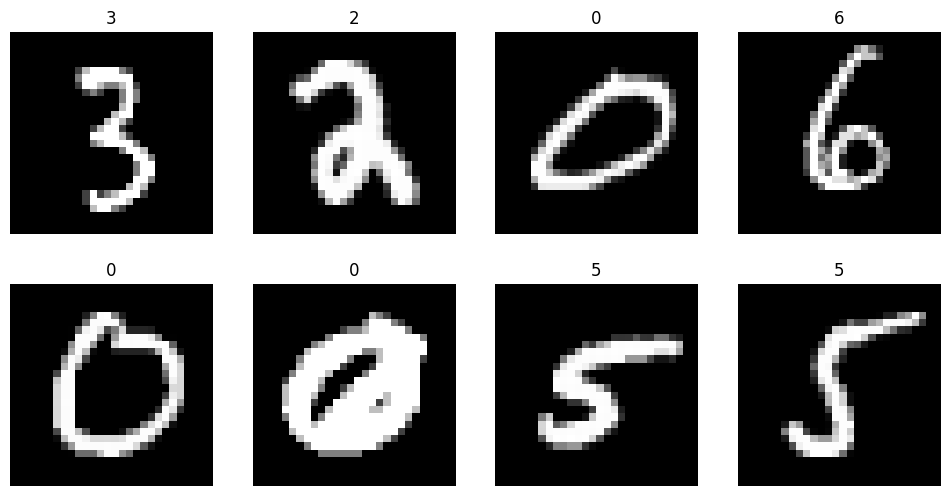

In [209]:
figure = plt.figure(figsize=(12, 6))
cols, rows = 4, 2
for i in range(1,cols * rows+1):
    sample_idx = torch.randint(len(trainset), size=(1, )).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap= 'gray')
plt.show()

## 신경망 구성

- 레이어(layer): 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- 모듈(module): 한 개 이상의 계층이 모여서 구성
- 모델(model): 한 개 이상의 모듈이 모여서 구성


### `torch.nn` 패키지

주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (`weight`값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html


In [210]:
import torch.nn as nn

nn.Linear 계층
- 완전 연결 계층(Fully Connected Layer)을 구현하는 클래스
- 입력 데이터에 대해 선형 변환(linear transformation)을 수행
- y = xA^T + b 형태로 계산 수행
  - x: 입력 데이터
  - A: 가중치 행렬 
  - b: 편향(bias)

주요 파라미터:
- in_features: 입력 특성의 크기
- out_features: 출력 특성의 크기
- bias: bias 항 사용 여부 (기본값: True)

입력 형태: (N, *, H_in) 
출력 형태: (N, *, H_out)
- N: 배치 크기
- *: 추가 차원
- H_in: in_features
- H_out: out_features

`nn.Linear` 계층 예제

In [211]:
nn.Conv2d(in_channels=1, out_channels=20,kernel_size=5,stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [212]:
layer = nn.Conv2d(1,20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

`weight` 확인

In [213]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

`weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [214]:
weight = weight.detach()

In [215]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

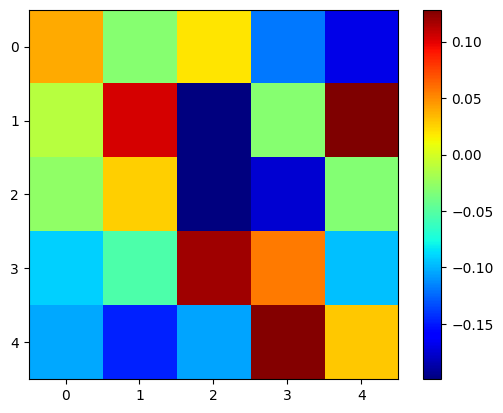

In [216]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

## 모델 정의


### `nn.Module` 상속 클래스 정의
- `nn.Module`을 상속받는 클래스 정의
- `__init__()`: 모델에서 사용될 모듈과 활성화 함수 등을 정의
- `forward()`: 모델에서 실행되어야 하는 연산을 정의

In [217]:
class Model(nn.Module):
    def __init__(self, inputs):
        super(Model,self).__init__()
        self.layer = nn.Linear(inputs,1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.layer(x)
        x = self.activation(x)
        return x

In [218]:
model =Model(1)
# nn.Module 클래스를 상속받으면 model(input) 이 호출될 때 자동으로 forward 메서드 호출
model(torch.tensor([1.])) 


tensor([0.5047], grad_fn=<SigmoidBackward0>)

### `nn.Sequential`을 이용한 신경망 정의
- `nn.Sequential` 객체로 그 안에 각 모듈을 순차적으로 실행
- `__init__()`에서 사용할 네트워크 모델들을 `nn.Sequential`로 정의 가능
- `forward()`에서 실행되어야 할 계산을 가독성 높게 작성 가능

In [219]:
import torch
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        # 입력이 32x32 이미지라고 가정했을 때, 두 개의 Conv2d와 MaxPool2d 레이어를 거치면
        # 최종 피쳐맵 크기가 5x5로 줄어듭니다.
        # 따라서 in_features는 30 * 5 * 5로 설정합니다.
        self.layer3 = nn.Sequential(
            nn.Linear(in_features=30 * 5 * 5, out_features=10, bias=True),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        # 입력 x를 layer1에 전달합니다.
        x = self.layer1(x)
        # layer1의 출력을 layer2에 전달합니다.
        x = self.layer2(x)
        # 마지막 Linear 계층에 전달하기 전에 평탄화합니다.
        x = x.view(x.shape[0], -1)
        # 평탄화한 출력을 layer3에 전달하여 최종 출력을 얻습니다.
        x = self.layer3(x)
        return x

In [220]:
model =Model()
# nn.Module 클래스를 상속받으면 model(input) 이 호출될 때 자동으로 forward 메서드 호출
model(torch.randn(1, 3, 32, 32))

tensor([[0.7333, 0.2425, 0.4976, 0.0000, 0.3172, 0.1141, 0.1438, 0.3539, 0.1434,
         0.0000]], grad_fn=<ReluBackward0>)

### 파이토치 사전학습 모델

* https://pytorch.org/vision/stable/models.html

## 모델 파라미터


### 손실 함수(Loss function)

* 예측 값과 실제 값 사이의 오차 측정
* 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
* 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표
* 손실 함수에 따른 결과를 통해 학습 파라미터를 조정
* 최적화 이론에서 최소화 하고자 하는 함수
* 미분 가능한 함수 사용
* 파이토치의 주요 손실 함수
  - `torch.nn.BCELoss`: 이진 분류를 위해 사용
  - `torch.nn.CrossEntropyLoss`: 다중 클래스 분류를 위해 사용
  - `torch.nn.MSELoss`: 회귀 모델에서 사용

In [221]:
criterion = nn.MSELoss()
criterion = nn.CrossEntropyLoss()

### 옵티마이저(Optimizer)

* 손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정 (특정 종류의 확률적 경사 하강법 구현)
* optimizer는 `step()`을 통해 전달받은 파라미터를 모델 업데이트
* 모든 옵티마이저의 기본으로 `torch.optim.Optimizer(params, defaults)` 클래스 사용
* `zero_grad()`를 이용해 옵티마이저에 사용된 파라미터들의 기울기를 0으로 설정
* `torch.optim.lr_scheduler`를 이용해 에포크(epochs)에 따라 학습률(learning rate) 조절
* 파이토치의 주요 옵티마이저: `optim.Adadelta`, `optim.Adagrad`, `optim.Adam`, `optim.RMSprop`, `optim.SGD`

<img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile25.uf.tistory.com%2Fimage%2F222B4F4F562BD0330EA41C">

### 학습률 스케줄러(Learning rate scheduler)

* 학습시 특정 조건에 따라 학습률을 조정하여 최적화 진행
* 일정 횟수 이상이 되면 학습률을 감소(decay)시키거나 전역 최소점(global minimum) 근처에 가면 학습률을 줄이는 등
* 파이토치의 학습률 스케줄러 종류
  - `optim.lr_scheduler.LambdaLR`: 람다(lambda) 함수를 이용해 그 결과를 학습률로 설정
  - `optim.lr_scheduler.StepLR`: 단계(step)마다 학습률을 감마(gamma) 비율만큼 감소
  - `optim.lr_scheduler.MultiStepLR`: `StepLR`과 비슷하지만 특정 단계가 아니라 지정된 에포크에만 감마 비율로 감소
  - `optim.lr_scheduler.ExponentialLR`: 에포크마다 이전 학습률에 감마만큼 곱함
  - `optim.lr_scheduler.CosineAnnealingLR`: 학습률을 코사인(cosine) 함수의 형태처럼 변화시켜 학습률일 커지기도 하고 작아지기도 함
  - `optim.lr_scheduler.ReduceLROnPlateau`: 학습이 잘되는지 아닌지에 따라 동적으로 학습률 변화

# 파이토치로 간단한 선형회귀 모델 학습하기

Text(0.5, 0, 'x')

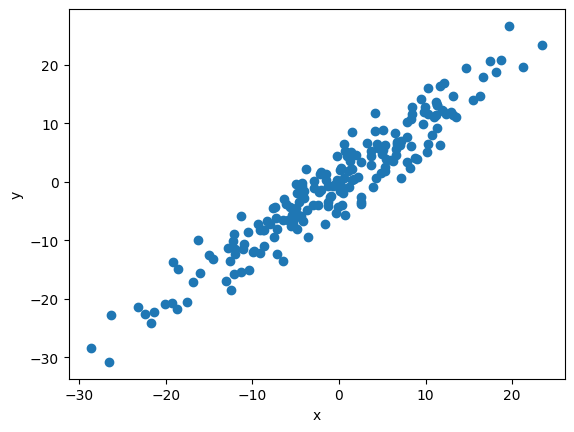

In [222]:
# 임의의 학습데이터 생성
x = torch.randn(200,1) * 10
y = x + 3 * torch.randn(200,1)
plt.scatter (x.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x')

### 모델 정의 및 파라미터

In [223]:
# 선형 회귀 모델을 정의하는 클래스입니다.
class LinearRegressionModel(nn.Module):
    # 모델 초기화 메서드입니다. 클래스가 생성될 때 호출됩니다.
    def __init__(self):
        # nn.Module의 초기화 메서드를 호출하여, LinearRegressionModel 클래스가 nn.Module을 상속받도록 설정합니다.
        super(LinearRegressionModel, self).__init__()
        
        # 선형 회귀 계층을 정의합니다. nn.Linear는 입력과 출력을 연결하는 선형 계층(fully connected layer)입니다.
        # 여기서 입력 특징(feature)의 수는 1, 출력 차원도 1로 설정합니다.
        # 예를 들어, 1차원 데이터 x가 입력되면, 단일 출력 y를 예측하는 단순 선형 회귀 모델입니다.
        self.linear = nn.Linear(1, 1)

    # 순전파(forward) 메서드를 정의합니다. 입력을 받아 출력을 계산합니다.
    # 이 메서드는 모델 객체를 호출할 때 자동으로 실행됩니다.
    def forward(self, x):
        # 선형 계층(self.linear)을 호출하여, 입력 x에 대해 예측값(pred)을 계산합니다.
        # nn.Linear 계층은 입력에 가중치를 곱하고 편향을 더해 y = wx + b 형태의 예측을 수행합니다.
        pred = self.linear(x)
        
        # 계산된 예측값 pred를 반환합니다.
        # 이 값은 주어진 x에 대해 모델이 예측한 출력 값입니다.
        return pred


In [224]:
model =  LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[0.0254]], requires_grad=True), Parameter containing:
tensor([-0.2563], requires_grad=True)]


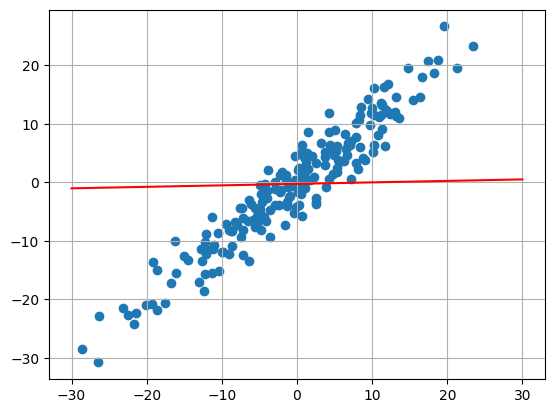

In [225]:
w, b = model.parameters()

w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30, 30])
y1 = w1 * x1 +b1

plt.plot(x1, y1, 'r')
plt.scatter(x,y)
plt.grid()
plt.show()

### 손실 함수 및 옵티마이저

In [228]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=0.001)

### 모델 학습

In [229]:
# 총 학습 횟수(에포크 수)를 정의합니다. 모델은 이 횟수만큼 데이터에 대해 반복 학습을 수행합니다.
epochs = 100

# 손실 값을 저장할 리스트를 초기화합니다. 각 에포크에서 계산된 손실을 저장하여 학습 추이를 확인할 수 있습니다.
losses = []

# 에포크 수만큼 학습을 반복합니다.
for epoch in range(epochs):
    # 1. 옵티마이저의 모든 그라디언트를 0으로 초기화합니다.
    #    이전 에포크에서 계산된 그라디언트가 누적되지 않도록 매 에포크마다 초기화해야 합니다.
    optimizer.zero_grad()

    # 2. 모델을 사용하여 예측값(y_pred)을 계산합니다.
    #    학습 데이터 x를 모델에 입력하여 예측값을 생성합니다. 이 값은 모델의 현재 가중치에 기반한 예측입니다.
    y_pred = model(x)

    # 3. 예측값(y_pred)과 실제값(y) 사이의 손실을 계산합니다.
    #    손실 함수(criterion)를 사용하여 예측값과 실제값의 차이를 측정하고, 이 값은 모델의 성능을 평가하는 지표가 됩니다.
    loss = criterion(y_pred, y)

    # 4. 계산된 손실 값을 리스트에 저장합니다.
    #    `loss.item()`은 손실 값을 스칼라 값으로 반환하여, 이후 학습 추이를 시각화하거나 분석하는 데 사용됩니다.
    losses.append(loss.item())

    # 5. 역전파 단계에서 그라디언트를 계산합니다.
    #    `loss.backward()`는 손실 함수의 값에 따라 각 가중치에 대한 그라디언트를 계산합니다.
    #    이 그라디언트는 모델의 각 파라미터에 저장되어, 가중치 업데이트에 사용됩니다.
    loss.backward()

    # 6. 옵티마이저를 사용하여 가중치를 업데이트합니다.
    #    `optimizer.step()`은 계산된 그라디언트를 바탕으로 모델의 가중치를 업데이트합니다.
    #    이 단계에서 모델이 손실을 줄이는 방향으로 학습하게 됩니다.
    optimizer.step()


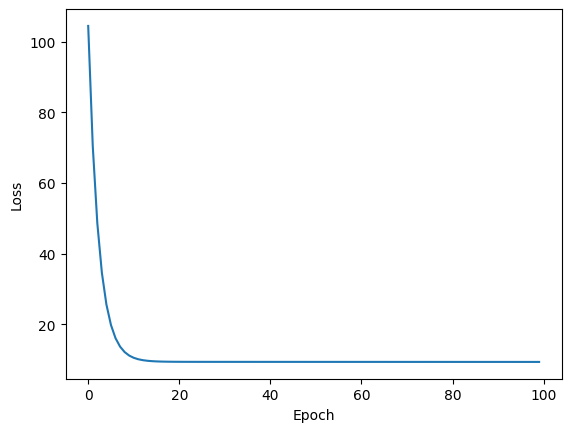

In [230]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

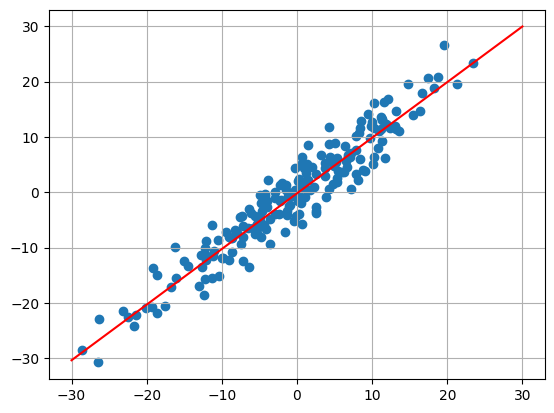

In [231]:
w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30, 30])
y1 = w1 * x1 +b1

plt.plot(x1, y1, 'r')
plt.scatter(x,y)
plt.grid()
plt.show()

## FashionMNIST 분류 모델

GPU 설정

In [232]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

### 데이터 로드

In [233]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5, ))])

In [234]:
trainset = datasets.FashionMNIST(root='/content/',
                                 train  = True, download = True,
                                 transform=transform)

testset = datasets.FashionMNIST(root='/content/',
                                 train = False, download = True,
                                 transform=transform)

100%|██████████| 26421880/26421880 [00:07<00:00, 3311506.72it/s]


Extracting /content/FashionMNIST\raw\train-images-idx3-ubyte.gz to /content/FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 112515.23it/s]


Extracting /content/FashionMNIST\raw\train-labels-idx1-ubyte.gz to /content/FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1846461.40it/s]


Extracting /content/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to /content/FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 5159444.92it/s]

Extracting /content/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to /content/FashionMNIST\raw



In [235]:
train_loader = DataLoader(trainset, batch_size=128,shuffle=True, num_workers=2)
test_loader = DataLoader(trainset, batch_size=128,shuffle=True, num_workers=2)

In [236]:
images, labels =  next(iter(train_loader))
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

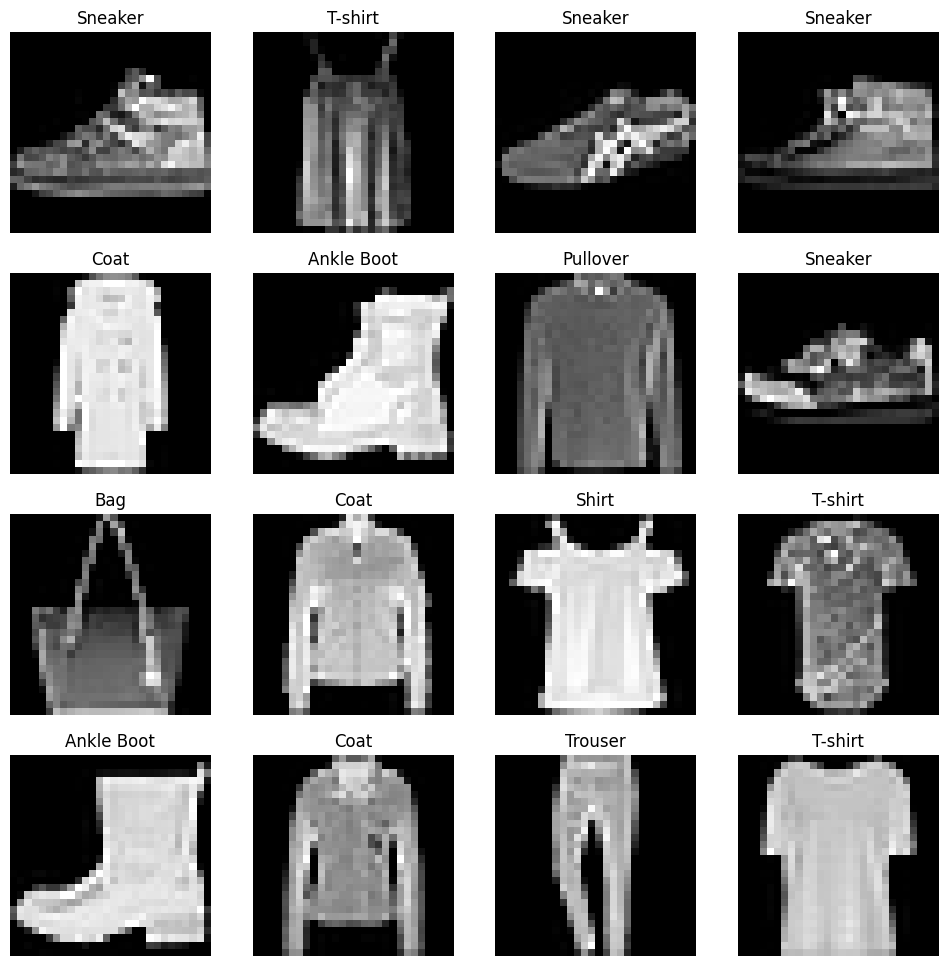

In [237]:
labels_map = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot',
}

figure = plt.figure(figsize=(12,12))
cols, rows = 4, 4
for i in range(1,cols*rows+1):
    image = images[i].squeeze()
    label_idx = labels[i].item()
    label = labels_map[label_idx]

    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(image, cmap='gray')

plt.show()



### 모델 정의 및 파라미터

In [241]:
import torch.nn.functional as F
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s

        return num_features

net = NeuralNet()
print(net)

NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [242]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [243]:
input = torch.randn(1,1,28,28)
out = net(input)
print(out)

tensor([[ 0.0293,  0.0368,  0.2004, -0.0828,  0.1029,  0.0004, -0.0862,  0.1561,
          0.0733, -0.0015]], grad_fn=<AddmmBackward0>)


### 손실함수와 옵티마이저

In [244]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 모델 학습

배치수 확인

In [245]:
total_batch = len(train_loader)
print(total_batch)

469


In [246]:
for epoch in range(10):
    running_loss = 0.0

    for i, data in enumerate(train_loader):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 100 == 99:
            print("Epoch: {}, iter: {}, Loss: {}".format(epoch+1,i+1,running_loss/2000))
            running_loss = 0.0

Epoch: 1, iter: 100, Loss: 0.11514196074008942
Epoch: 1, iter: 200, Loss: 0.11475757241249085
Epoch: 1, iter: 300, Loss: 0.1144322452545166
Epoch: 1, iter: 400, Loss: 0.11386321473121643
Epoch: 2, iter: 100, Loss: 0.11152766263484955
Epoch: 2, iter: 200, Loss: 0.10708483111858368
Epoch: 2, iter: 300, Loss: 0.09276455700397492
Epoch: 2, iter: 400, Loss: 0.066536456823349
Epoch: 3, iter: 100, Loss: 0.04464760878682136
Epoch: 3, iter: 200, Loss: 0.03911795005202293
Epoch: 3, iter: 300, Loss: 0.03639079686999321
Epoch: 3, iter: 400, Loss: 0.034209227949380874
Epoch: 4, iter: 100, Loss: 0.03221233847737312
Epoch: 4, iter: 200, Loss: 0.03160248948633671
Epoch: 4, iter: 300, Loss: 0.031426306053996086
Epoch: 4, iter: 400, Loss: 0.029966726049780845
Epoch: 5, iter: 100, Loss: 0.029572957649827005
Epoch: 5, iter: 200, Loss: 0.029276734903454782
Epoch: 5, iter: 300, Loss: 0.028900946959853173
Epoch: 5, iter: 400, Loss: 0.02725510957837105
Epoch: 6, iter: 100, Loss: 0.02717409662902355
Epoch: 6, 

### 모델의 저장 및 로드

- `torch.save`: `net.state_dict()`를 저장
- `torch.load`: `load_state_dict`로 모델을 로드

In [247]:
PATH = './fashion_mist.pth'
torch.save(net.state_dict(), PATH)

In [248]:
net = NeuralNet()
net.load_state_dict(torch.load(PATH))

C:\Users\rlaal\AppData\Local\Temp\ipykernel_1316\3779921715.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(PATH))


<All keys matched successfully>

In [249]:
net.parameters

<bound method Module.parameters of NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

### 모델 테스트

In [250]:
def imshow(image):
    image = image / 2 + 0.5
    npimg = image.numpy()

    fig = plt.figure(figsize = (16, 8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


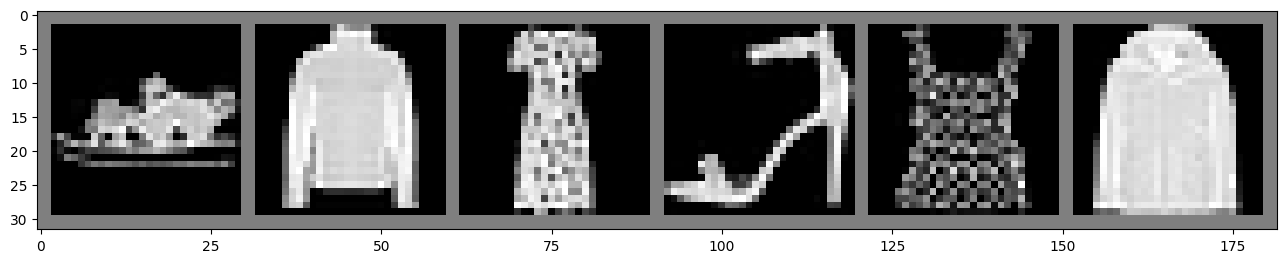

In [251]:
import torchvision

dataiter = iter(test_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:6]))

In [252]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)
print(predicted)

tensor([7, 4, 3, 5, 6, 4, 2, 9, 2, 0, 9, 9, 9, 0, 7, 1, 1, 3, 6, 7, 3, 1, 3, 2,
        1, 1, 5, 2, 3, 0, 3, 8, 2, 6, 4, 3, 7, 8, 8, 6, 4, 2, 1, 9, 6, 7, 1, 1,
        6, 1, 1, 7, 2, 4, 7, 4, 4, 0, 0, 6, 5, 6, 5, 0, 7, 3, 7, 6, 8, 8, 0, 8,
        7, 8, 8, 1, 7, 3, 5, 9, 0, 3, 2, 1, 5, 5, 8, 5, 8, 5, 2, 3, 3, 4, 9, 3,
        1, 7, 6, 4, 6, 4, 8, 6, 2, 0, 4, 6, 0, 8, 3, 9, 1, 1, 1, 2, 9, 7, 1, 6,
        6, 8, 1, 6, 8, 9, 1, 4])


In [253]:
print(''.join('{}. '.format(labels_map[int(predicted[j].numpy())]) for j in range(6)))

Sneaker. Coat. Dress. Sandal. Shirt. Coat. 


In [254]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(100 * correct / total)


80.46875
